In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\mazlt\Desktop\Repositorio GitHub\data\Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
columns_to_drop = ['Channel', 'Region']
data_cluster = data.drop(columns=columns_to_drop)
data_cluster.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
data_cluster.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

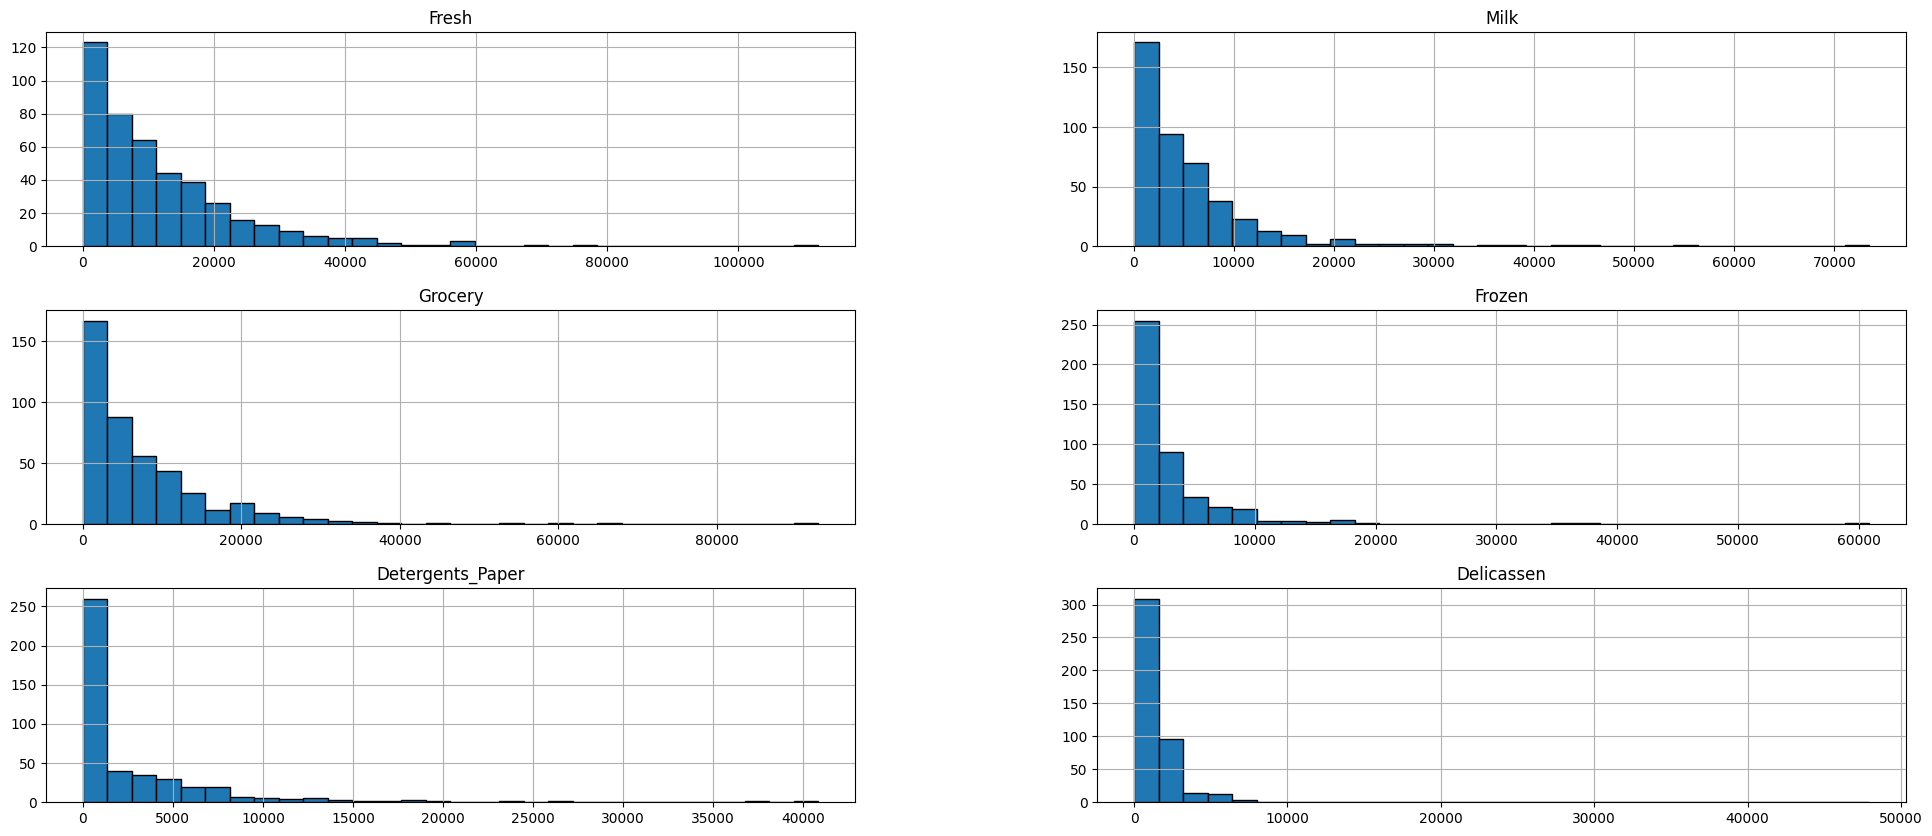

In [5]:
data_cluster.hist(figsize=(24,10),bins=30,edgecolor='black')

In [6]:
from sklearn.preprocessing import normalize

data_scaled=normalize(data_cluster)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [7]:
from sklearn.decomposition import PCA 
pca = PCA()
data_scaled = pca.fit_transform(data_scaled)

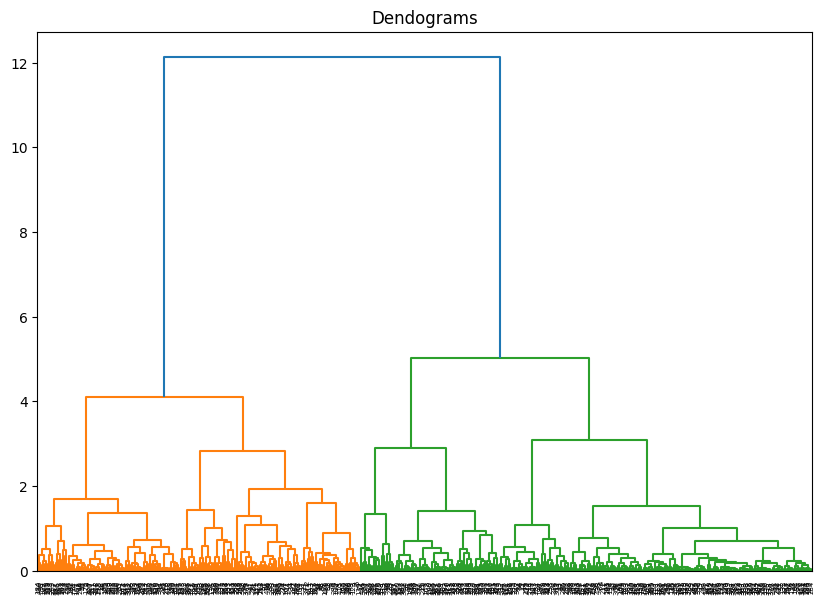

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

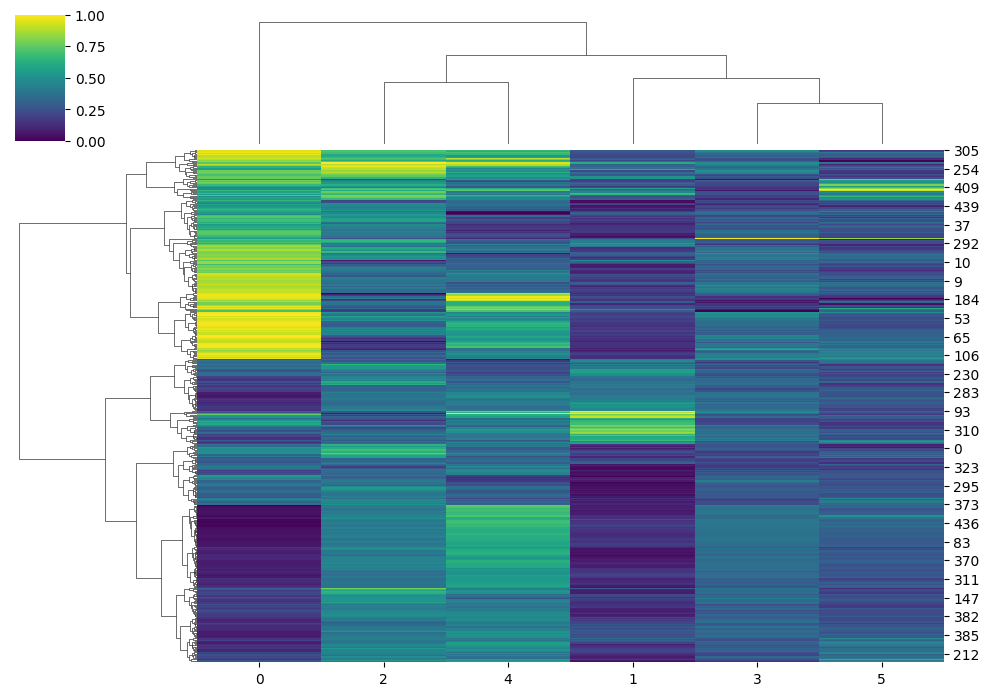

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(data_scaled, method='ward', cmap='viridis', standard_scale=1, figsize=(10,7))
plt.show()

In [10]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

z = shc.linkage(data_scaled, method='ward')

n_clusters = 2
clusters = fcluster(z, n_clusters, criterion='maxclust')

In [11]:
cluster = pd.DataFrame(clusters, columns=['Cluster'])
cluster

,Cluster
0,1
1,1
2,1
3,2
4,2
...,...
435,2
436,2
437,1
438,2


In [12]:
data['Cluster']=cluster['Cluster'].values
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


In [13]:
#crea un nuevo archivo csv con la limpieza realizada
data.to_csv('datos_luster.csv',index=False)

INICIAR K MEANS

In [16]:
from sklearn.cluster import KMeans
n = 2
kmeans = KMeans(n_clusters=n, init='random')
kmeans.fit(data_scaled)
Z = kmeans

c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mazlt\anaconda3\envs\Actividad1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2)

In [18]:
data['Cluster K'] = Z
data.head(20)

NameError: name 'Z' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
inercias = []
valores_k = range(1,10) # Ajusta el rango de k segun necesites
for k in valores_k:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(data_scaled)
    inercias.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(alores_k,inercias,'-o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters, k')
plt.ylabel('inercia')
plt.xticks(valores_k)